### AI-09 Practice 1  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

#### Parameters  

In [2]:
csv_in = 'ai-09-practice1.csv'

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(350, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d1      350 non-null    float64
 1   d2      350 non-null    float64
 2   d3      350 non-null    float64
 3   d4      350 non-null    float64
 4   w       350 non-null    float64
dtypes: float64(5)
memory usage: 13.8 KB
None


,d1,d2,d3,d4,w
0,5.18,7.39,-1.68,0.33,37.78
1,3.67,8.26,1.02,-0.17,30.18
2,4.02,8.27,-1.44,-1.59,35.58
3,4.29,6.99,-1.34,0.26,29.61
4,3.45,8.34,-0.36,0.93,28.42


#### Get X and y  

In [4]:
X = df.loc[:, 'd1':'d4']  # explanatory variables
y = df['w']  # objective variable
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (350, 4)


,d1,d2,d3,d4
0,5.18,7.39,-1.68,0.33
1,3.67,8.26,1.02,-0.17
2,4.02,8.27,-1.44,-1.59
3,4.29,6.99,-1.34,0.26
4,3.45,8.34,-0.36,0.93


y: (350,)
0    37.78
1    30.18
2    35.58
3    29.61
4    28.42
Name: w, dtype: float64


#### Split X and y for train and test  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7)

#### Scaling  

In [6]:
sc = MinMaxScaler(feature_range=(0, 1), copy=True)
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#### Parameters for SVR  

In [7]:
C = 10.0
gamma = 0.5
epsilon = 0.1

#### Execute SVR  

In [8]:
svr = SVR(gamma=gamma, C=C, epsilon=epsilon)
svr.fit(X_train_std, y_train)

SVR(C=10.0, gamma=0.5)

#### Do prediction using train data  

In [9]:
y_train_pred = svr.predict(X_train_std)

#### Scaling of Test data and do prediction  

In [10]:
X_test_std = sc.transform(X_test)
y_test_pred = svr.predict(X_test_std)

#### Check MSE  

In [11]:
mse_train = mean_squared_error(y_train_pred, y_train)
print('MSE (train):', mse_train)
mse_test = mean_squared_error(y_test_pred, y_test)
print('MSE (test):', mse_test)

MSE (train): 0.6901490513253247
MSE (test): 0.47846857150600464


**Ans. 0.478**  

#### Scatter plot of output of SVR (prediction) and true value for train / test data  

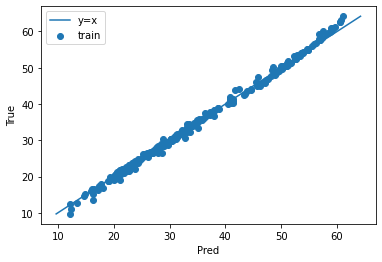

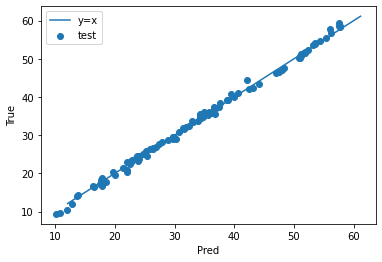

In [12]:
plt.scatter(y_train_pred, y_train, label='train')
xmin = np.array([y_train.min(), y_train.max()])
xmax = np.array([y_train.min(), y_train.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

plt.scatter(y_test_pred, y_test, label='test')
xmin = np.array([y_train_pred.min(), y_train_pred.max()])
xmax = np.array([y_train_pred.min(), y_train_pred.max()])
plt.plot(xmin, xmax, label='y=x')
plt.xlabel('Pred')
plt.ylabel('True')
plt.legend()
plt.show()

#### Save developed SVR model  

In [13]:
tag = 'ai-09-practice1'
sc_file = 'sc_{}.joblib'.format(tag)
dump(sc, sc_file)
model_file = 'svr_{}.joblib'.format(tag)
dump(svr, model_file)

['svr_ai-09-practice1.joblib']